<a href="https://colab.research.google.com/github/AllKashirin/Education/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%97_2_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_(Supervised_learning)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модуль 2. Обучение с учителем (Supervised learning)
## Прогноз доходности вложений в валюту



# Цель задания

В этом ноутбуке 5 заданий.

**Вам нужно:**

1.   Подгрузить необходимые данные.
2.   Подготовить данные к работе.
3.   Запустить несколько моделей на алгоритмах работы с учителем и оценить их эффективность.
4.   Запустить метод Grid Search для настройки её гиперпараметров и дать толкование работе кода.
5.   Сохранить обученную модель на диске.

**Задача, которую мы будем решать,** — прогнозирование цены USD с использованием исторических данных. Нам нужно понять, какие факторы оказывают наиболее сильное влияние, и, следовательно, включить как можно больше информации в модель.

**Каждое выполненное задание оценивается максимум в 2 балла:**
* Задание выполнено корректно — 2 балла.
* Задание выполнено частично верно — 1 балл.
* Задание выполнено неверно — 0 баллов.


**Формат сдачи:** вам нужно прикрепить на платформе **ссылку** на измененный ноутбук. Файл .ipynb присылать не нужно.

**Условия сдачи:** ваш блокнот должен без ошибок автоматически выполнять весь код при нажатии	«Среда выполнения» / 	«Выполнить все» в верхнем меню.

В этом ноутбуке реализовано разделение на уровни сложности и идентификация автора работы. Для выполнения задания следуйте инструкциям ниже.

## Выбор уровня сложности

Запустите код в этой ячейке, чтобы выбрать один из трех уровней сложности.

Выбор уровня сложности не влияет на максимальное количество баллов, которые вы можете получить.

In [ ]:
%%capture
!pip install pandas==2.0.3 gdown==4.7.3 requests==2.31.0 apimoex==1.4.0 lxml==4.9.4 ipynbname==2023.2.0.0
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gdown
import time
import json
import requests
import apimoex
import hashlib
from IPython.display import Markdown
import ipywidgets as widgets
from ipywidgets import Button
from IPython.display import display
start = time.time()

In [ ]:
import ipywidgets as widgets
student_topic_choice = 2
topics_list = ['Простое задание',
               'Стандартное задание',
               'Сложное задание']
topic_options = {topic: index + 1 for index, topic in enumerate(topics_list)}
select_widget = widgets.Dropdown(options=topic_options.keys(), value=topics_list[student_topic_choice-1], description='Выбор:')

def on_select(change):
    global student_topic_choice
    student_topic_choice = topic_options[change['new']]
    display(Markdown(f"выбрана тематика заданий: **{change['new']}**"))

select_widget.observe(on_select, names='value')
display(Markdown("""Мне интересно задание"""))
select_widget

Мне интересно задание

Dropdown(description='Выбор:', index=1, options=('Простое задание', 'Стандартное задание', 'Сложное задание'),…

## Идентификация автора работы


После запуска этого кода блока вы становитесь автором данного блокнота, запрещая другим студентам пользоваться результатами своего труда, и принимаете на себя обязательства не передавать другим студентам ссылку на данный блокнот и/или файл ipynb.

В процессе выполнения кода приложение запросит доступ к данным вашего Google-аккаунта и созданию файлов. Это необходимо для создания промежуточных файлов, которые помогут подтвердить авторство работы.

Если вы не доверяете приложению, то можете завести дополнительный Google-аккаунт, на котором будут размещаться ноутбуки.

In [ ]:
import hashlib
from google.colab import auth
from google.colab import drive
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import requests
import json
import uuid
import datetime
import ipynbname
auth.authenticate_user()
drive_service = build('drive', 'v3')                # Разрешите доступ на чтение вашего email
drive.mount('/content/drive', force_remount = True) # Разрешите доступ на запись на ваш Google Drive
nb_name = ipynbname.name()
file_id = str(uuid.uuid4())
with open("/content/"+file_id, 'w') as f:  f.write(file_id)
# Метод создает файл на Google Drive и потом его удаляет
file_metadata = {'name': 'unique_marker_'+file_id,'mimeType': 'text/plain'}
media = MediaFileUpload("/content/"+file_id,mimetype='text/plain', resumable=True)
created = drive_service.files().create(body=file_metadata,media_body=media,
                                       fields='id').execute()
response = drive_service.files().get(fileId=created.get('id'), fields='owners(emailAddress)').execute()
owner_email = response['owners'][0]['emailAddress']
response = drive_service.files().delete(fileId=created.get('id')).execute()

def get_hashed_email():
  hashed_email =hashlib.sha256(str.encode(owner_email)).hexdigest()
  return hashed_email
moment = datetime.datetime.now().isoformat()
exclusive_copyright = {
    "timestamp_remote":str(moment),
    "email_hash":str(get_hashed_email()),
    "homework_no":"2",
    "nb_name":nb_name,
    "sealed":hashlib.sha256(str.encode(owner_email+":"+moment+":"+nb_name)).hexdigest()
}
result = requests.post('https://autotest-egister.amvera.io/exclusive_copyright/', data=json.dumps(exclusive_copyright)).text

print(f"Зафиксировано авторство {result}",exclusive_copyright)

Mounted at /content/drive
Зафиксировано авторство "OK" {'timestamp_remote': '2024-04-24T18:26:46.840389', 'email_hash': 'b10ff273099d0ec13c15670e06f6d06c8ec567a1a890751a6da076b555f67022', 'homework_no': '1', 'nb_name': 'fileId=1Dbiuao2WhSFoRF-vjwDroccJ5MElffv-', 'sealed': 'fbdda19ba170fb61dacbda880ead45bd0aafbef96e12f166a73ba49e1e31cde5'}


# Начало работы: установка библиотек и загрузка данных

## Установка библиотек

In [ ]:
!pip install statsmodels keras tensorflow requests gdown -q
!pip install git+https://github.com/pydata/pandas-datareader.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import time
import json
import requests
start = time.time()

In [ ]:
# Импортируем библиотеки ML
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
import statsmodels.api as sm

# Импортируем библиотеки DL
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
# from keras.wrappers.scikit_learn import KerasRegressor

# Сохранение и загрузка модели
from pickle import dump
from pickle import load

# Модель работы с временными рядами
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# Метрики
from sklearn.metrics import mean_squared_error

# Работа с графиками
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


## Загрузка набора данных

Мы будем использовать высокоуровневую библиотеку pandas datareader.

In [ ]:
start_date = '2022-07-01'
end_date = '2023-07-01'
asset = 'USD000UTSTOM'
df = web.get_data_moex(asset, start=start_date,end=end_date)
df.shape

(254, 10)

## Задание 1. Подгрузить данные по активу

In [ ]:
# Этот код напечатает задание №1 внизу
description = ["""Вам необходимо выяснить,
как называется аналогичный [инструмент](https://www.moex.com/ru/derivatives/optionsdesk.aspx?code=USD000UTSTOM)
по валютной паре EUR/RUR и подгрузить данные за небольшой период (от 6 до 24 месяцев).""",
"""Вам необходимо выяснить,
как называется аналогичный [инструмент](https://www.moex.com/ru/derivatives/optionsdesk.aspx?code=USD000UTSTOM)
по валютной паре EUR/RUR и подгрузить данные за большой период (от 12 до 24 месяцев).""",
"""Вам необходимо выяснить,
как называется аналогичный [инструмент](https://www.moex.com/ru/derivatives/optionsdesk.aspx?code=USD000UTSTOM)
по валютной паре CNY/RUR и подгрузить данные за большой период (от 24 до 48 месяцев).."""]
display(Markdown(f"""{description[student_topic_choice-1]}"""))

Вам необходимо выяснить,
как называется аналогичный [инструмент](https://www.moex.com/ru/derivatives/optionsdesk.aspx?code=USD000UTSTOM)
по валютной паре EUR/RUR и подгрузить данные за большой период (от 12 до 24 месяцев).

In [ ]:
def task1():
  # Введите ваш код сюда
  start_date = '2022-0x-01'
  end_date = '2024-0x-01'
  asset = 'наименование инструмента'
  # Введите ваш код сюда
  df = web.get_data_moex(asset, start=start_date,end=end_date)
  return {"start_date":start_date,
          "end_date":end_date,
          "asset":asset,
          "shape":df.shape
          }
task1()

{'start_date': '2022-04-01',
 'end_date': '2024-04-01',
 'asset': 'USD000UTSTOM',
 'shape': (506, 10)}

# Разведочный анализ данных

Проведем разведанализ данных. После него в задании 2 вам следует провести аналогичный для валютной пары USD/RUR

## Описательная статистика

Выведем описание характеристик:

In [ ]:
df.describe()

,CLOSE,HIGH,LOW,OPEN,VOLRUR,WAPRICE
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,69.084439,69.650463,68.348022,68.962589,8.689542e+10,68.979957
std,9.080249,8.988121,9.133457,9.026515,2.729952e+10,9.054340
min,54.500000,55.482500,51.102500,52.000000,1.080526e+10,54.019300
25%,60.684375,61.208750,60.266875,60.720625,6.976162e+10,60.636375
50%,68.815000,69.241250,67.945000,68.886250,8.199635e+10,68.721100
75%,77.078750,77.446250,76.518750,76.948750,1.004789e+11,76.950125
max,89.550000,89.770000,87.370000,87.780000,1.813634e+11,88.616400


Удалим неиспользуемые колонки:

In [ ]:
df = df.drop(['BOARDID','NUMTRADES','SECID','SHORTNAME'], axis=1)
df.head()

,CLOSE,HIGH,LOW,OPEN,VOLRUR,WAPRICE
TRADEDATE,,,,,,
2022-07-01,54.50,55.8700,51.1025,52.0000,1.324592e+11,54.0193
2022-07-04,55.24,56.5050,54.5025,55.4600,1.446112e+11,55.1194
2022-07-05,61.15,62.3000,55.2950,55.7775,1.674354e+11,59.3248
2022-07-06,63.35,64.9525,61.1725,62.1300,1.365891e+11,62.9645
2022-07-07,61.95,64.4675,61.6050,63.7000,1.006998e+11,62.8411


## Построение графиков

Далее посмотрим на распределение данных за весь период, разбив данные на 50 ячеек (bins, bukets):

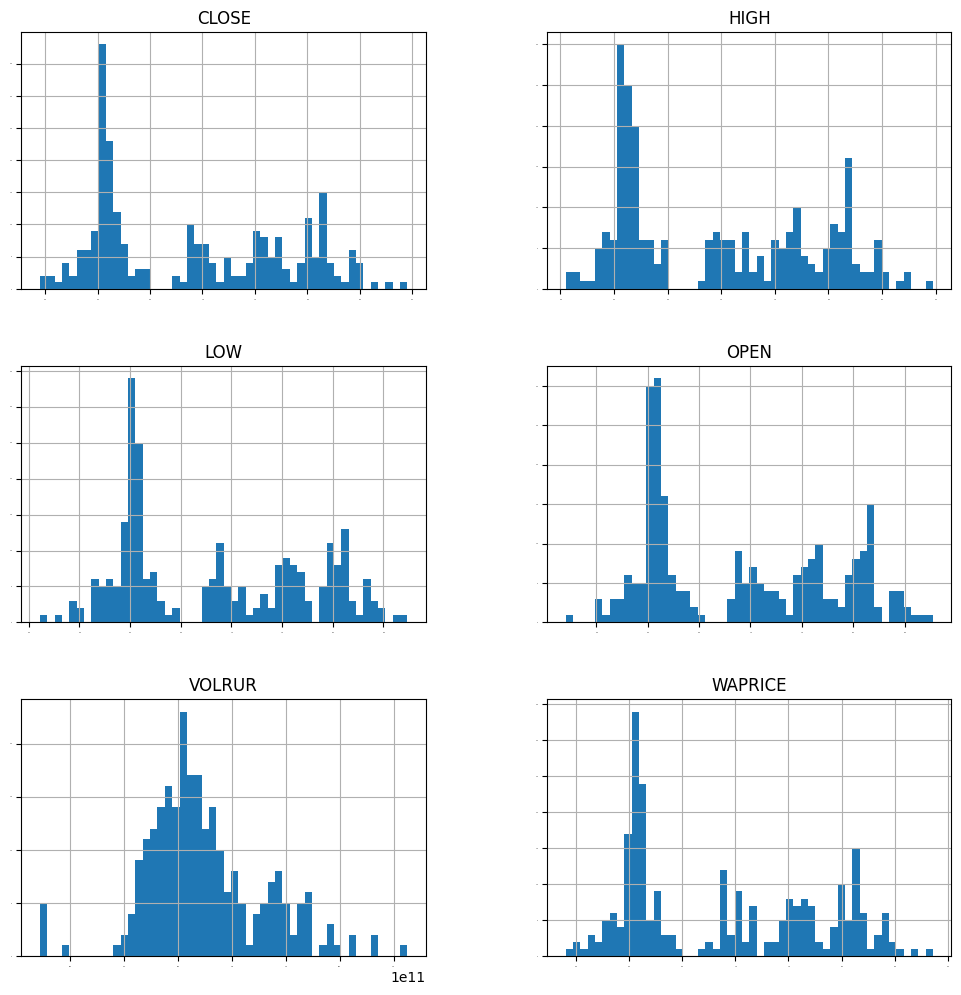

In [ ]:
df.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

Приведенная выше гистограмма показывает распределение для каждой серии в отдельности. Далее посмотрим на распределение плотности по той же шкале по оси Х:

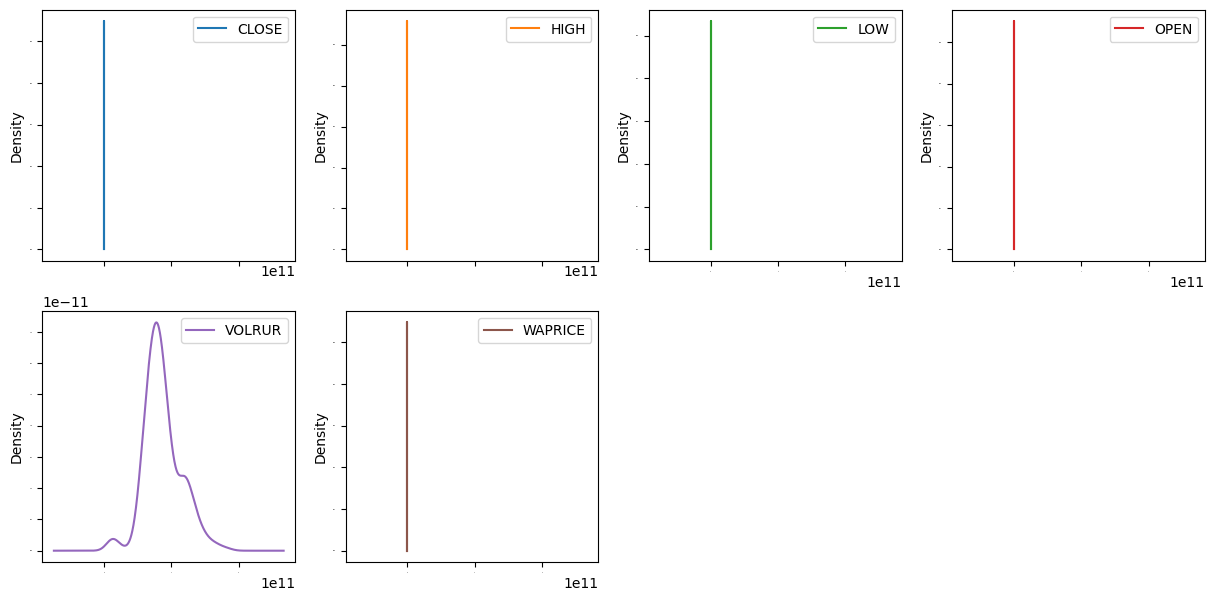

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Чтобы получить представление о взаимозависимости данных, строим корреляционную матрицу:

<Axes: title={'center': 'Корреляционная матрица'}>

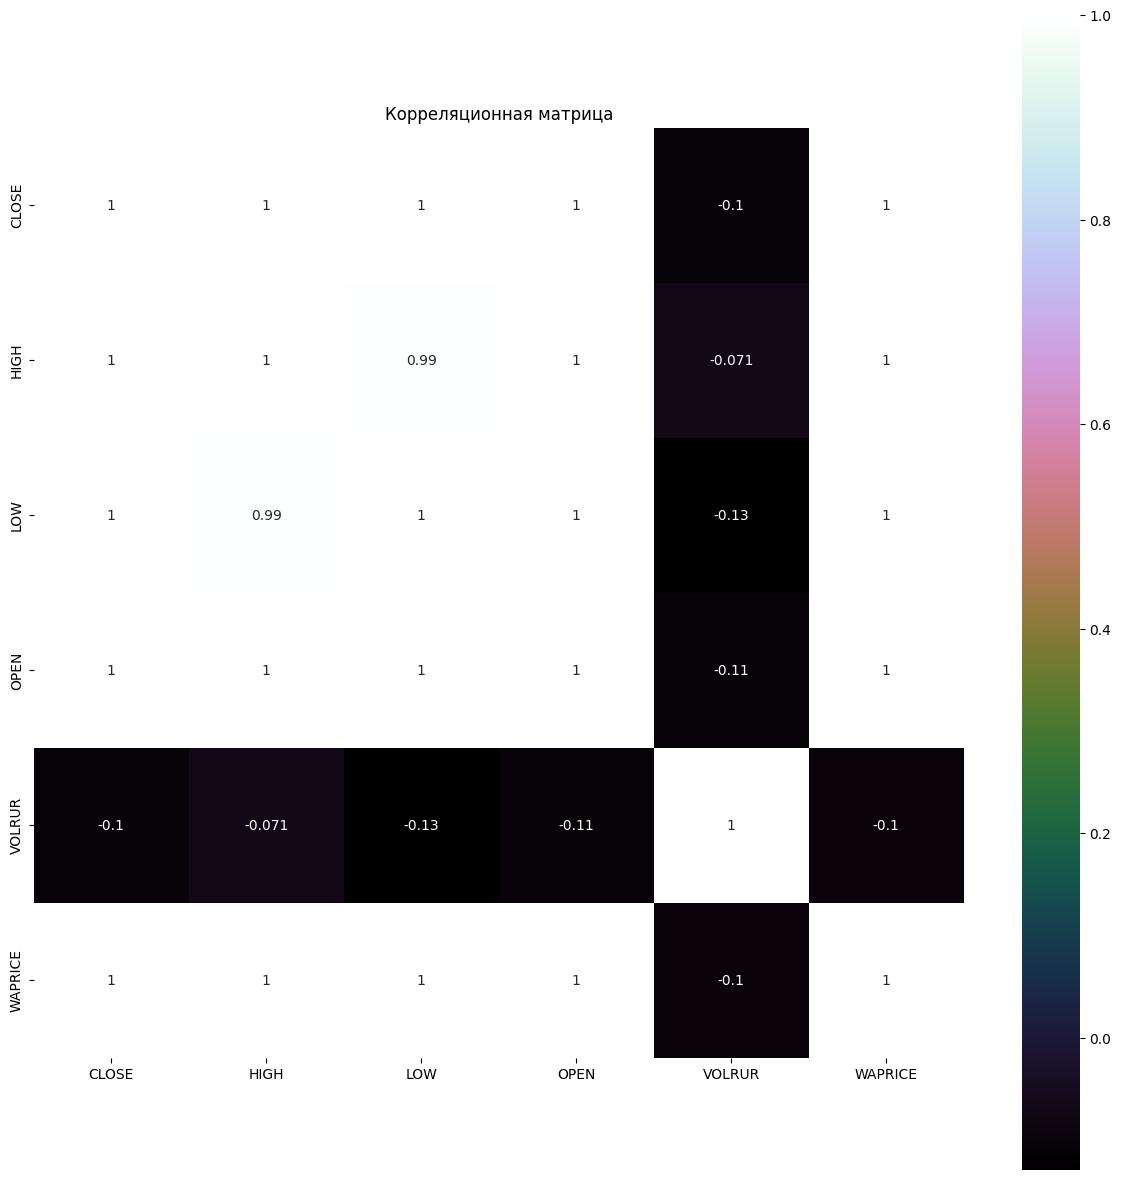

In [ ]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Корреляционная матрица')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

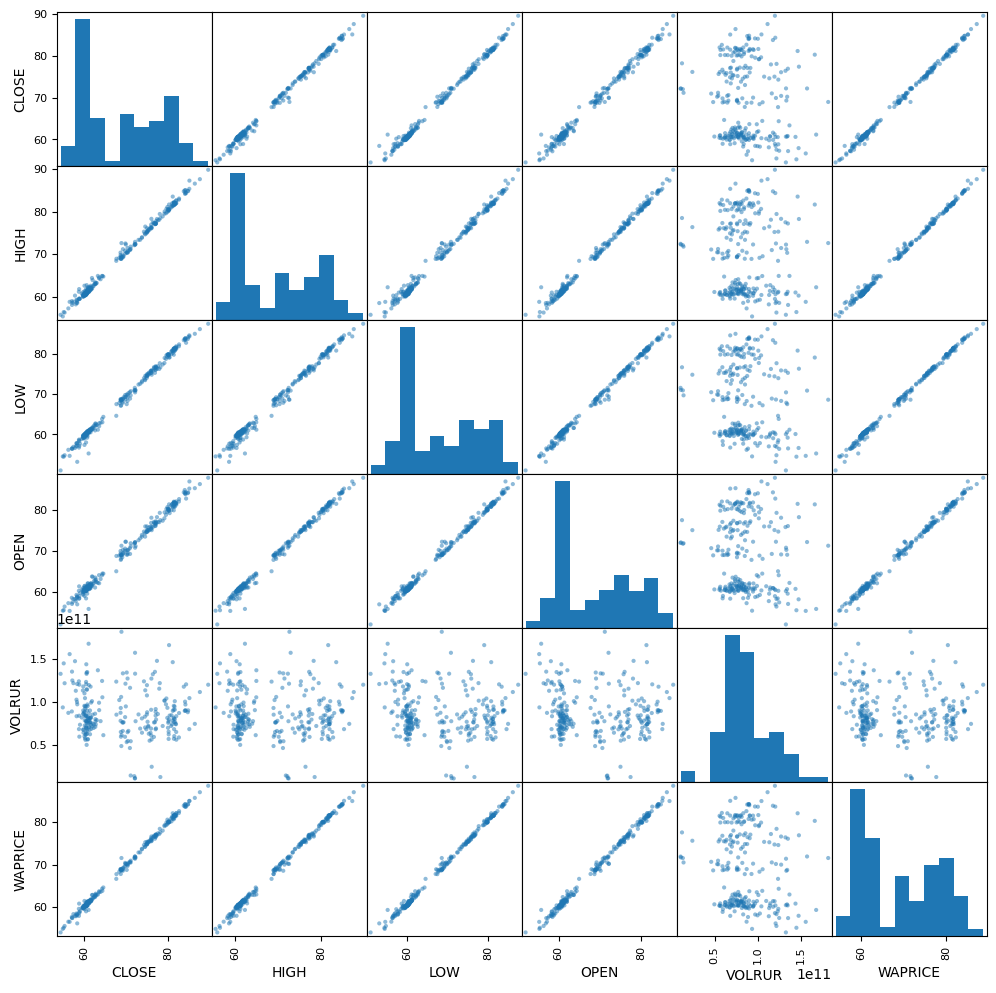

In [ ]:
pyplot.figure(figsize=(15,15))
scatter_matrix(df,figsize=(12,12))
pyplot.show()

## Анализ временных рядов

Далее рассмотрим сезонную составляющую наших временных рядов:

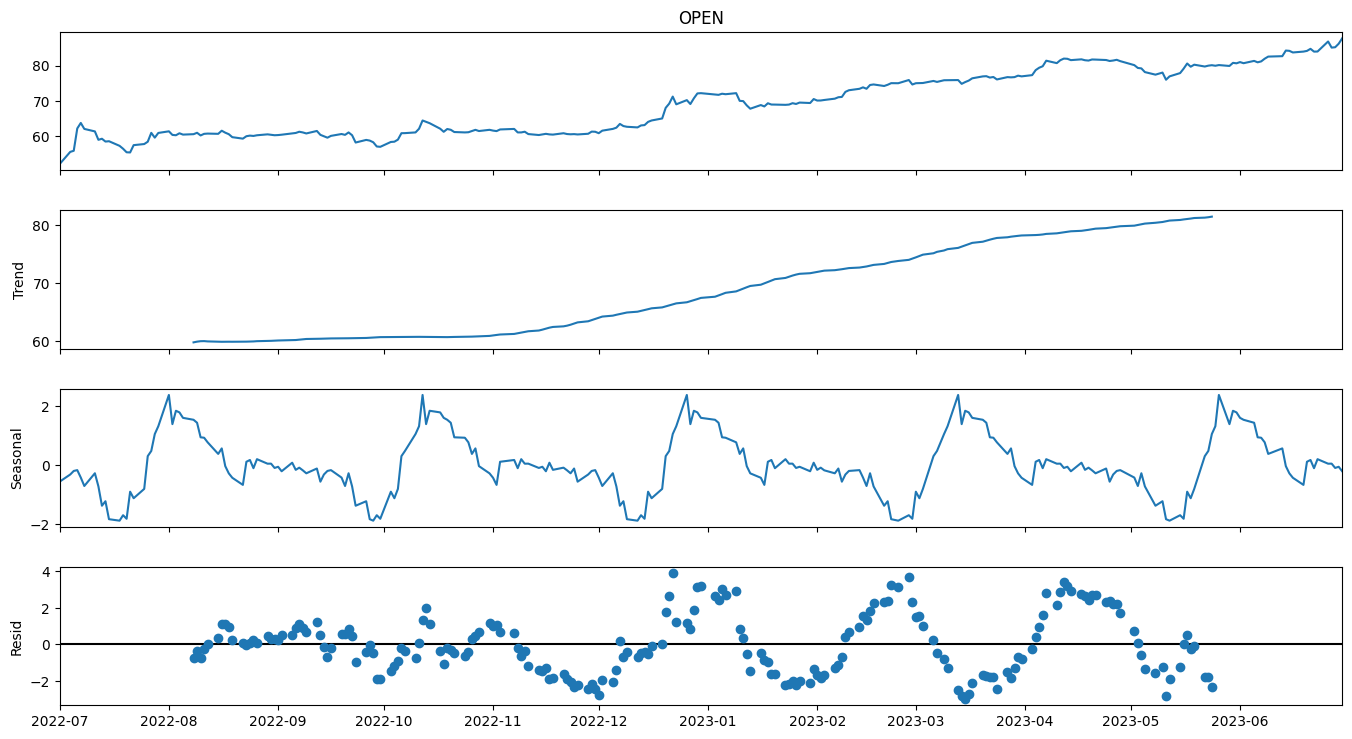

In [ ]:
res = sm.tsa.seasonal_decompose(df["OPEN"],period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

Виден четкий повышающийся тренд. Рассмотрим данные тренда и сезонности:

In [ ]:
res.trend.tail(100)

TRADEDATE
2023-02-06    72.185096
2023-02-07    72.260841
2023-02-08    72.350962
2023-02-09    72.451490
2023-02-10    72.546755
                ...    
2023-06-26          NaN
2023-06-27          NaN
2023-06-28          NaN
2023-06-29          NaN
2023-06-30          NaN
Name: trend, Length: 100, dtype: float64

In [ ]:
res.seasonal.tail(100)

TRADEDATE
2023-02-06   -0.290023
2023-02-07   -0.128112
2023-02-08   -0.573773
2023-02-09   -0.330882
2023-02-10   -0.210089
                ...   
2023-06-26    0.035614
2023-06-27    0.037669
2023-06-28   -0.108701
2023-06-29   -0.068617
2023-06-30   -0.221021
Name: seasonal, Length: 100, dtype: float64

## Задание 2. Анализ тренда и сезонности

In [ ]:
# Програмное создание задания №2
description = ["""Проведите аналогичный анализ тренда и сезонности по валютной паре USD/RUR.""",
"""Проведите аналогичный анализ тренда и сезонности по валютной паре EUR/RUR.""",
"""Проведите аналогичный анализ тренда и сезонности по валютной паре CNY/RUR."""]
display(Markdown(f"""{description[student_topic_choice-1]}"""))


Проведите аналогичный анализ тренда и сезонности по валютной паре EUR/RUR.

In [ ]:
def task2():
  global df
  res = sm.tsa.seasonal_decompose(df["OPEN"],period=52)
  # Введите ваш код сюда
  trend = res.ххххххх.values.tolist()
  seasonal = res.ххххххх.values.tolist()
  # Введите ваш код сюда
  return ",".join([str(i) for i in trend]+[str(i) for i in seasonal])
task2()

# Процесс оценки эффективности алгоритмов и моделей

## Показатели/метрики/оценки и разделение набора данных на обучающий и тестовый

Далее начинаем с разделения наших данных на обучающие и тестовые наборы. Если собираемся использовать модели временных рядов, то должны разделить данные также на непрерывные ряды.

In [ ]:
Y = df[['WAPRICE']]
X = df[['VOLRUR']]
X.head()

,VOLRUR
TRADEDATE,
2022-07-01,1.324592e+11
2022-07-04,1.446112e+11
2022-07-05,1.674354e+11
2022-07-06,1.365891e+11
2022-07-07,1.006998e+11


In [ ]:
validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

## Варианты проверки модели и показатели оценки

In [ ]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

## Сравнение моделей

Ниже приведен код, который запустит модели.

В результате его выполнения мы запустим несколько моделей на тестовой выборке данных и получим два графика:

1. Сравнительный график работы моделей методом k-fold.

2. Сравнительный график количества ошибок при работе на учебной и тестовой выборке.

Ваша задача — запустить модели, проанализировать графики и в Задании 3 обосновать выбор одной из предложенных моделей.

### Модели машинного обучения scikit-learn

##### Регрессия и алгоритмы решающих деревьев:

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

##### Нейросетевой алгоритм (многослойный перцептрон):

In [ ]:
# models.append(('MLP', MLPRegressor()))

##### Ансамблевые модели:

In [ ]:
# Бустинг
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Бэггинг
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

После того как мы выбрали все модели, перебираем каждую из них. Сначала запускаем K-кратный анализ. Затем запускаем модель на всем наборе данных для обучения и тестирования.

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    ## K Fold analysis:

    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    # Преобразуем среднеквадратичную ошибку в положительную: чем меньше, тем лучше
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)


    # Обучение
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

    # Проверка
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

    msg = "Алгортим %s:\t среднее=%f\t ст.отк=(%f)\t обуч=%f\tпровер=%f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Алгортим LR:	 среднее=51.529162	 ст.отк=(16.851883)	 обуч=49.611499	провер=255.880576
Алгортим LASSO:	 среднее=51.529162	 ст.отк=(16.851883)	 обуч=49.611499	провер=255.880576
Алгортим EN:	 среднее=51.529162	 ст.отк=(16.851883)	 обуч=49.611499	провер=255.880576
Алгортим KNN:	 среднее=64.132138	 ст.отк=(18.961656)	 обуч=45.365801	провер=282.675244
Алгортим CART:	 среднее=108.805242	 ст.отк=(17.498790)	 обуч=0.000000	провер=359.612070
Алгортим SVR:	 среднее=63.021905	 ст.отк=(28.602659)	 обуч=60.087460	провер=374.087392
Алгортим ABR:	 среднее=58.029091	 ст.отк=(11.577974)	 обуч=49.896268	провер=217.026493
Алгортим GBR:	 среднее=66.620283	 ст.отк=(19.061808)	 обуч=23.291703	провер=291.045256
Алгортим RFR:	 среднее=79.038659	 ст.отк=(19.907311)	 обуч=11.039585	провер=312.293922
Алгортим ETR:	 среднее=87.485874	 ст.отк=(22.911066)	 обуч=0.000000	провер=335.120170


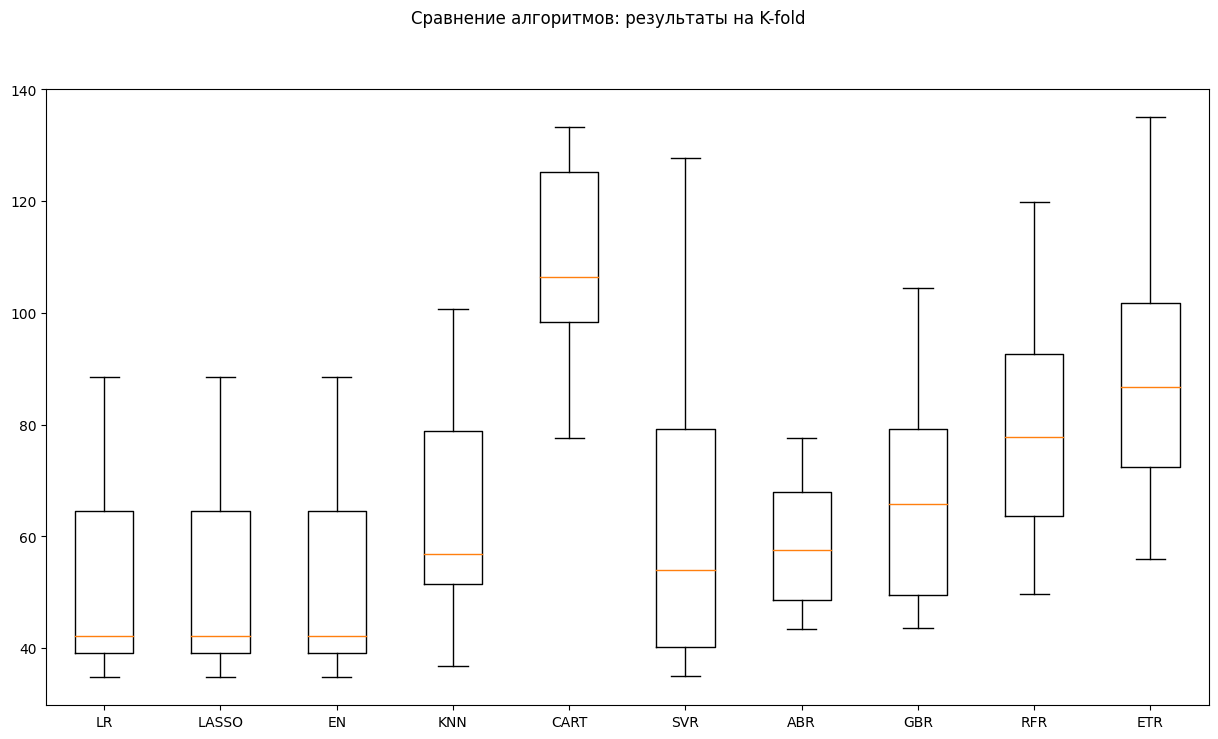

In [ ]:
fig = pyplot.figure()
fig.suptitle('Сравнение алгоритмов: результаты на K-fold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

Мы видим, что линейная регрессия и регуляризованная регрессия, включая регрессию Лассо (LASSO) и эластичную сеть (EN), справляются хорошо.

#### Ошибки на обучающем и тестовом наборе данных:

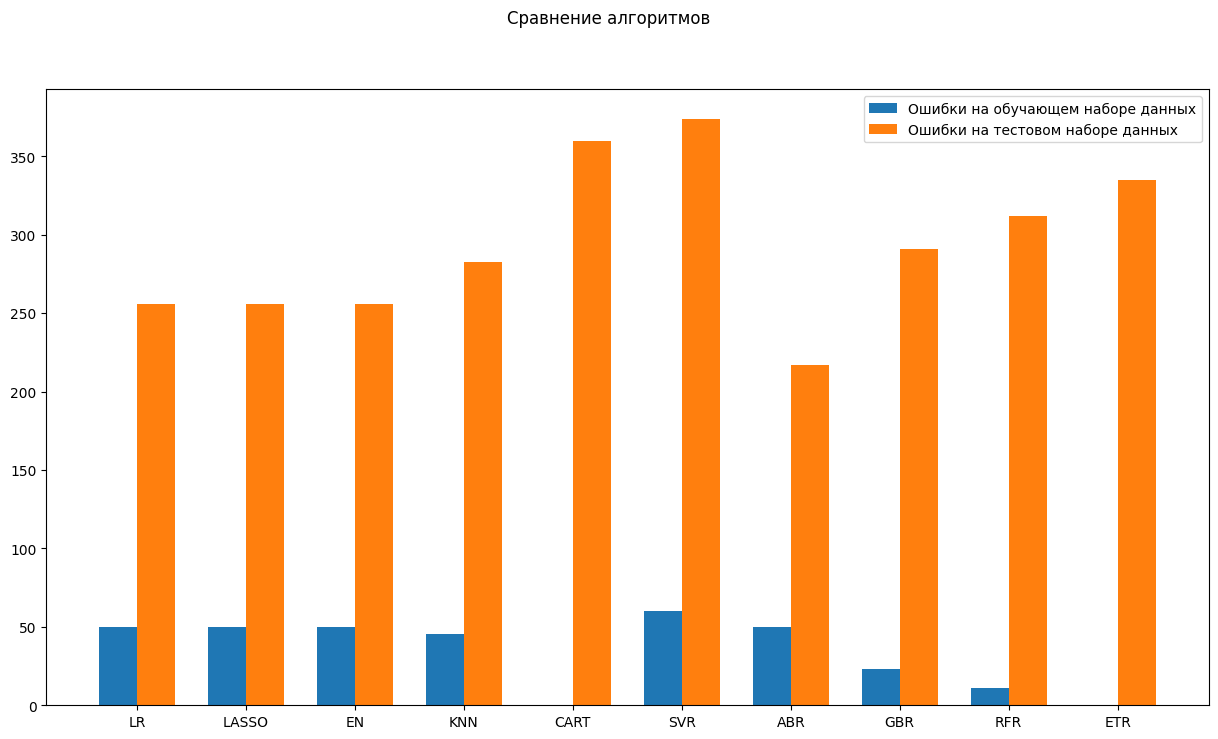

In [ ]:
# Сравнение алгоритмов
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Сравнение алгоритмов')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Ошибки на обучающем наборе данных')
pyplot.bar(ind + width/2, test_results, width=width, label='Ошибки на тестовом наборе данных')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Рассматривая ошибки на наборах данных для обучения и тестирования, мы по-прежнему видим лучшую производительность линейных моделей.

Регрессор дерева решений (CART) перегружает данные обучения и приводит к очень высокой ошибке в тестовом наборе. Таких моделей следует избегать.

Ансамблевые модели, такие как регрессия с повышением градиента (GBR) и
случайный лес (RFR), имеют низкое смещение, но высокую дисперсию.



## Задание 3. Обоснование выбора модели

In [ ]:
# Програмное создание задания №3
description = ["""Выберите одну из этих моделей: `LR`, `LASSO`, `EN`, `KNN`""",
"""Выберите одну из этих моделей: `CART`, `SVR`, `ABR`, `GBR`""",
"""Выберите одну из этих моделей: `RFR`, `ETR`"""]
display(Markdown(f"""{description[student_topic_choice-1]}.  Опишите её сильные и слабые стороны"""))


In [ ]:
def task3():
  """
  Выберите модель и опишите ее сильные и слабые стороны. Свой ответ укажите как значение переменной description_of_algorithm
  """
  # Введите ваш код сюда
  description_of_algorithm=""

  # Введите ваш код сюда
  return description_of_algorithm
task3()

### Модели на основе временных рядов ARIMA и LSTM

Рассмотрим, как с этой задачей справятся модели ARIMA и LSTM.

ARIMA — алгоритм, который используется для прогнозирования временных рядов. Он объединяет авторегрессионные, интегрированные и скользящие средние компоненты для моделирования временных рядов и их прогнозирования.

LSTM — простейшая нейросеть.

Для ARIMA подготовим набор данных, используя только коррелированные переменные в качестве экзогенных переменных.

### Модель ARIMA

In [ ]:
tr_len = len(X_train)
te_len = len(X_test)
to_len = len (X)
print(len(X_train), len(Y_train))

In [ ]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train,order=[1,0,0])
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

###  Модель LSTM

In [ ]:
seq_len = 2 # Длина последовательности LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [ ]:
# Нейросеть LSTM
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
    # Последовательная модель
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    # При необходимости можно добавить большее количество ячеек
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

In [ ]:
# Визуальный график, позволяющий проверить, уменьшается ли функция ошибки
pyplot.plot(LSTMModel_fit.history['loss'], label='Ошибка на обучающем наборе данных')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='Ошибка на тестовом наборе данных')
pyplot.legend()
pyplot.show()

In [ ]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

#### Добавим модели временных рядов для сравнения с другими моделями:

In [ ]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

## Общее сравнение всех алгоритмов (включая алгоритмы временных рядов)

In [ ]:
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Общее сравнение всех алгоритмов (включая алгоритмы временных рядов)')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Ошибка на обучающем наборе данных')
pyplot.bar(ind + width/2, test_results, width=width, label='Ошибка на тестовом наборе данных')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Среднеквадратичная ошибка')
pyplot.show()

Взглянув на приведенную выше диаграмму, мы видим, что модель ARIMA, основанная на временных рядах, сопоставима с моделями линейной контролируемой регрессии, такими как линейная регрессия (LR), регрессия Лассо (LASSO) и эластичная сеть (EN). В первую очередь это может быть связано с сильной линейной
зависимостью, как обсуждалось ранее. Модель LSTM работает нормально, однако
модель ARIMA превосходит модель LSTM в тестовом наборе. Следовательно, мы выбираем модель ARIMA для настройки модели.

# Настройка модели и подбор гиперпараметров (Grid Search)

Как показано на диаграмме выше, модель ARIMA является одной из лучших, поэтому мы выполняем настройку модели ARIMA. Параметры модели ARIMA по умолчанию равны [1,0,0].

Мы выполняем поиск по сетке с различными комбинациями p, d и q в порядке модели ARIMA.

In [ ]:
# Поиск по сетке модели ARIMA
# Измените p, d и q и проверьте наилучший результат

# Оцените модель ARIMA для заданного порядка (p,d, q)
# Предполагая, что данные поезда и тестирования уже определены ранее
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

# оцените комбинации значений p, d и q для модели ARIMA
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s Среднеквадратичная ошибка=%.7f' % (order,mse))
                except:
                    continue
    print('Лучшая ARIMA %s Среднеквадратичная ошибка=%.7f' % (best_cfg, best_score))

# Оцениваем параметры
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

## Задание 4. Толкование кода

In [ ]:
def task4():
  """
  В приведенном выше фрагменте кода использован метод поиска
  гиперпараметров по сетке модели (так называемый GridSearch).
  Опишите, как вы понимаете назначение строк кода
      for p in p_values:
        for d in d_values:
            for q in q_values:

  """
  # Введите ваш код сюда
  description_of_grid_search=""

  # Введите ваш код сюда
  return description_of_grid_search
task4()

# Принимаем окончательное решение по модели

## Результаты на тестовом наборе данных

In [ ]:
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [ ]:
# Оцениваем точность на тестовом наборе данных
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

После настройки модели и выбора лучшей модели ARIMA или порядка 2, 0 и 1 мы выбираем эту модель и можем ее использовать для целей моделирования.

## Сохранение модели для дальнейшего использования

In [ ]:
from pickle import dump
from pickle import load

# Сохранить на диск
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

## Задание 5. Выполните сохранение модели на диск

In [ ]:
# Програмное создание задания №5
description = ["""сохраните модель на диск в формате [CSV](https://docs.python.org/3/library/csv.html)""",
"""сохраните модель на диск в формате [Pickle](https://docs.python.org/3/library/pickle.html)""",
"""сохраните модель на диск в формате [HDF5](https://docs.h5py.org/en/stable/)"""]
display(Markdown(f"""{description[student_topic_choice-1]} и сделайте вывод о скорости записи и размере файла"""))


In [ ]:
def task5():
  # Введите ваш код сюда
  filename = ''

  # Введите ваш код сюда
  result = !ls
  return filename in ",".join(result)
task5()

### Выводы

Мы можем сделать вывод, что простые модели — линейная регрессия, регуляризованная регрессия (например, Лассо и эластичная сеть) — наряду с моделью временных рядов, такой как ARIMA, являются многообещающими подходами для решения задачи прогнозирования цен на валюту. Эти модели могут позволить финансистам моделировать временные зависимости.

Общий подход может помочь нам справиться с переобучением и недообучением, которые являются одними из ключевых проблем в задаче прогнозирования в финансах. Необходимо отметить, что дополнительно мы можем использовать расширенный набор индикаторов, таких как объем торгов, технические индикаторы (RSI, ...) или новостные данные, что дает лучшие результаты.

В итоге сегодня мы создали простую регрессию и смоделировали временные ряды, что позволяет нам выполнять разные задачи прогнозирования цен активов с использованием исторических данных.

## Отметка о выполнении задания

In [ ]:
%%capture
def send_submission_attempt(b):
  result = requests.post(str('https://autotest-egister.amvera.io/submission_attempt/'),
  data=json.dumps({
      "start":str(start),
      "task1":str(task1())[:100],
      "task2":str(task2())[:100],
      "task3":str(task3())[:100],
      "task4":str(task4())[:100],
      "task5":str(task5())[:100],
      "id":get_hashed_email()+":"+nb_name,
      "stop":str(time.time()),
      "duration":str(time.time()-start),
      "homework":2
  })).text
  display(Markdown(f"Результат отправки {result} {datetime.datetime.now().isoformat()}"))
button = Button(description='Отправить')
button.on_click(send_submission_attempt)

In [ ]:
checkbox = widgets.Checkbox(value=False, description='подтверждаю')
display(Markdown("Я закончил(а) работу с заданиями. Эту работу я выполнил(а) самостоятельно."),checkbox,button)

# Задание на дополнительный балл

Пожалуйста, изучите [реализацию GridSearch](https://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) (поиск гиперпараметров по сетке) в библиотеке sklearn.

Реализуйте поиск гиперпараметров по сетке любым алгоритмом на любом наборе данных.